# Rozpoznanie osób palących na podstawie ich wewnętrznego stanu biologicznego

Na podstawie zbioru: https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking

In [2]:
import pandas as pd
df = pd.read_csv('smoking.csv')

## Opis danych wejściowych

Przedstawienie pierwszych pięciu wierszy zbioru danych za pomocą funkcji *head()*. Zbiór danych zawiera 27 atrybuty przedstawione poniżej.

In [3]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


Zapoznanie się z krótkim opisem danych za pomocą funkcji *info()*. Funkcja ta ukazuje ogólne informacje o danych, takie jak liczba wierszy, typy danych oraz ewentualne brakujące wartości.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

Zbiór składa się z 55 692 przykładów. Większość atrybutów ma wartości typu numerycznego (int64 i float64).

Wyjątek stanowią trzy pola: gender - opisujące płeć badanego pacjenta, oral - opisujące stan jamy ustnej pacjenta, tartar - opisujące czy pacjent posiada kamień nazębny. Typem tych atrybutów jest object, czyli nadrzędna klasa dla wszystkich obiektów tekstowych stworzonych w Pythonie.

Wartości tych trzech pól są powtarzalne, co oznacza, że stanowią one wartości kategorialne.

Warto więc sprawdzić powtarzalność tych danych.

In [5]:
df["gender"].value_counts()

gender
M    35401
F    20291
Name: count, dtype: int64

In [6]:
df["oral"].value_counts()

oral
Y    55692
Name: count, dtype: int64

In [7]:
df["tartar"].value_counts()

tartar
Y    30940
N    24752
Name: count, dtype: int64

Zauważyć można, że zarówno wartości atrybutu *gender*, jak i *tartar* są wartościami typu binarnego (zawierają tylko dwie kategorie). Natomiast wartość atrybutu *oral* posiada tylko jedną kategorię dla wszystkich wierszy, co prowadzi do wniosków, że można usunąć te kolumnę.

Oba binarne atrybuty zostaną więc, za pomocą funkcji *replace()*, przekształcone na wartość binarną, gdzie
- dla *gender*: 0-F, 1-M,
- dla *tartar*: 0-N, 1-Y.

In [8]:
df['gender'].replace({'M': 1, 'F': 0}, inplace=True)
df['tartar'].replace({'Y': 1, 'N': 0}, inplace=True)

Po wykonaniu tej operacji, dla obu kolumn zostały utworzone nowe kolumny binarne. Każda z tych kolumn reprezentuje jedną z unikalnych wartości, a wiersze zawierają wartości 0 lub 1.

## Analiza eksploracyjna

Analiza wszystkich pól numerycznych metodą *describe()*, która daje możliwość podsumowania atrybutów numerycznych. Obejmuje ona średnie, odchylenia standardowe, minimum, maksimum zbioru i inne wartości opisujące dane.

In [9]:
df.describe()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,0.635657,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,...,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.555556,0.367288
std,16077.039933,0.481250,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,...,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.496908,0.482070
min,0.000000,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,...,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,13922.750000,0.000000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,...,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000,0.000000
50%,27845.500000,1.000000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,...,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,1.000000,0.000000
75%,41768.250000,1.000000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,...,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000,1.000000
max,55691.000000,1.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,...,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000,1.000000


Z wywołania funkcji *describe()* wynika, że dla każdej kolumny istnieją 55692 niepuste wartości, co oznacza, że w zbiorze nie ma wartości pustych dla żadnej kolumny.

Na podstawie tych wartości można zauważyć, że odchylenia standardowe różnią się dla różnych cech, co sugeruje, że dane nie zostały ustandaryzowane. Średnie wartości różnią się również dla różnych cech, co oznacza, że dane nie zostały znormalizowane. Może być to spowodowane różnicami w jednostkach, w jakich wyrażane są dane oraz zakresach między różnymi kolumnami.

## Analiza etykiety

Celem przewidywań jest kolumna *smoking*, przypisująca osobę o danych parametrach biologicznych do jednej z dwóch kategorii (pali albo nie pali).

Pracując z problemem klasyfikacji, warto sprawdzić, jak reprezentowane są dane w kolumnie etykiety.

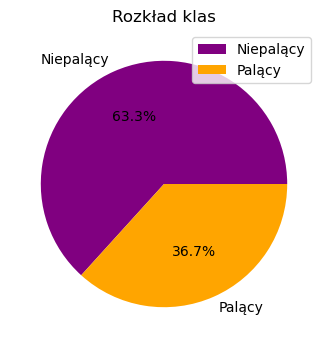

In [10]:
import matplotlib.pyplot as plt

target_dis = df['smoking'].value_counts()
plt.figure(figsize=(6, 4))
target_dis.plot(kind='pie', labels=['Niepalący', 'Palący'], autopct='%1.1f%%', colors=['purple', 'orange'])
plt.title('Rozkład klas')
plt.ylabel('')

plt.legend(loc='upper right')

plt.show()

Zauważyć można, że większość, bo aż 2/3 badanych pacjentów jest niepaląca. Kolumna ta jest niezrównoważona, ponieważ jedna klasa występuje znacznie częściej niż druga, co wpływa na wydajność modelu klasyfikacyjnego.

Z racji 55k danych w zbiorze *smoking.csv* możemy sobie pozwolić zarówno na metodę oversamplingu, jak i metodę undersamplingu. W przypadku tego wzoru, z uwagi na jego niewielki rozmiar, może jednak okazać się podejście oversamplingu, czyli duplikowania wierszy klasy, której jest w zbiorze zdecydowanie mniej.

Aby zrównoważyć obie te grupy użyta zostanie metoda $RandomOverSampler$ z biblioteki *imbalanced-learn*, która polega na losowym duplikowaniu próbek z klasy mniejszościowej.

In [11]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop('smoking', axis=1)
y = df['smoking']

over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X, y)

Poniższy kod pokazuje, jaki podział etykiet występuje przed oversamplingiem i po wykonaniu metody $RandomOverSampler$.

In [13]:
print("Liczba próbek przed oversamplingiem:")
print(y.value_counts())

print("\nLiczba próbek po oversamplingu:")
print(pd.Series(y_res).value_counts())

df_resampled = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res, columns=['smoking'])], axis=1)

Liczba próbek przed oversamplingiem:
smoking
0    35237
1    20455
Name: count, dtype: int64

Liczba próbek po oversamplingu:
smoking
0    35237
1    35237
Name: count, dtype: int64


A tak w tej chwilii wartości kolumny etykiet rozkładają się na wykresie kołowym.

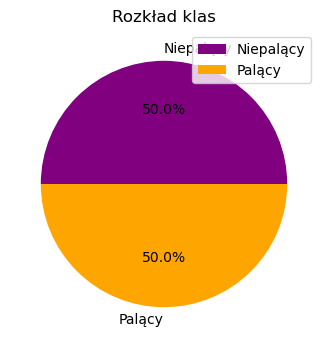

In [15]:
target_dis_resampled = df_resampled['smoking'].value_counts()
plt.figure(figsize=(6, 4))
target_dis_resampled.plot(kind='pie', labels=['Niepalący', 'Palący'], autopct='%1.1f%%', colors=['purple', 'orange'])
plt.title('Rozkład klas')
plt.ylabel('')

plt.legend(loc='upper right')

plt.show()

Zbiór danych zostanie teraz podzielony na dwie części: cechy i etykiety. 
Cechy to kolumny, na podstawie których model będzie przypisywał obiekt (w tym przypadku badanego pacjenta) do jednej z dwóch kategorii. Należą  do nich wszystkie kolumny oprócz kolumn 'smoking', 'ID' (identyfikator to nieistotna cecha) oraz 'oral' atrybut, którego wartości przybierają jedynie jedną wartość (cecha, która nie daje żadnej istotnej informacji). 
Etykiety (inaczej targety) to wartości które chcemy przewidzieć. Targetem więc będzie kolumna 'smoking', czyli informacja o tym czy dany pacjent jest palący.

In [16]:
data = df_resampled.drop(['smoking', 'ID', 'oral'], axis = 1)
target = df_resampled['smoking']

Z wcześniejszego wywołania funkcji *describe()* wynika, że dane numeryczne są nieustandaryzowane (standardowe odchylenia nie są równe 0). Możemy to zaobserwować poniżej.

In [19]:
numeric_data = data.select_dtypes(include='number')

print("Średnia")
print(numeric_data.mean(axis=0))
print("\nStandardowe odchylenie")
print(numeric_data.std(axis=0))

Średnia
gender                   0.703891
age                     43.621406
height(cm)             165.649034
weight(kg)              66.931776
waist(cm)               82.629215
eyesight(left)           1.020481
eyesight(right)          1.016012
hearing(left)            1.024392
hearing(right)           1.025187
systolic               121.810682
relaxation              76.323155
fasting blood sugar     99.882680
Cholesterol            196.712802
triglyceride           131.705962
HDL                     56.581917
LDL                    114.497432
hemoglobin              14.797178
Urine protein            1.089210
serum creatinine         0.898926
AST                     26.534438
ALT                     27.902333
Gtp                     43.361410
dental caries            0.225232
tartar                   0.568806
dtype: float64

Standardowe odchylenie
gender                  0.456543
age                    11.987445
height(cm)              8.955666
weight(kg)             12.817178
waist

Z powyższych danych możemy się przekonać, że dane numeryczne nie są ustandaryzowane. Za pomocą funkcji fit_transform z biblioteki sklearn.preprocessing standaryzujemy dane, aby uzyskać odchylenie standardowe równe 1.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

print("Średnia")
print(scaled_data.mean(axis=0))
print("Standardowe odchylenie")
print(scaled_data.std(axis=0))

Średnia
[ 6.45269675e-17  2.45202477e-16 -1.38410345e-15  4.61367818e-16
  5.45252876e-16 -2.00840186e-16  2.16165341e-16 -3.86758512e-16
 -3.08317917e-16 -1.09695845e-16 -7.25928385e-16 -1.93580903e-17
  2.44194243e-16 -5.48479224e-17  1.74222812e-16 -1.02436561e-16
  1.96807251e-15  1.14132074e-16  5.00083998e-16 -1.20988064e-18
  3.22634838e-18  4.19425289e-17  1.93580903e-17 -4.03293547e-17]
Standardowe odchylenie
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Po przeskalowaniu danych otrzymaliśmy ustandaryzowane dane numeryczne. Można to stwierdzić obserwując, że standardowe odchylenie we wszystkich przypadkach wynosi 1.

# Podział danych

Przygotowane i ustandaryzowane dane zostaną nastepnie podzielone na zbiór treningowy i zbiór testowy. Zbiór treningowy zawiera 80% danych całego zbioru, zbiór testowy 20%. Dzięki ustawieniu parametru random_state zapewnione jest, że dane, przy każdym uruchomieniu, będą podzielone na te same zbiory.

In [22]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)